In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [13]:
variables = ['A2','A3','A8', 'A11', 'A14', 'A15', 'class']
dataset=pd.read_csv("/content/credit-approval.csv",usecols=variables)

# Split Data into TRain Test and Split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(
    dataset.drop('class', axis=1), dataset['class'], test_size=0.3,random_state=0)

In [37]:
imputer=IterativeImputer(
    estimator=BayesianRidge(), # the estimator to predict the NA
    initial_strategy='mean', # how will NA be imputed in step 1
    max_iter=10, # number of cycles
    imputation_order='ascending', # the order in which to impute the variables
    n_nearest_features=None, # whether to limit the number of predictors
    skip_complete=True, # whether to ignore variables without NA
    random_state=0)

In [38]:
imputer.fit(X_train)

IterativeImputer(estimator=BayesianRidge(), random_state=0, skip_complete=True)

In [39]:
train_t=imputer.transform(X_train)
test_t=imputer.transform(X_test)

In [43]:
pd.DataFrame(train_t, columns=X_train.columns).isnull().sum()


A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
dtype: int64

#Compare imputation with different models

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [47]:
X_train.shape, X_test.shape


((483, 6), (207, 6))

In [48]:
imputer_bayes = IterativeImputer(
                estimator=BayesianRidge(),
                max_iter=10,
                random_state=0)

imputer_knn=IterativeImputer(
                    estimator=KNeighborsRegressor(n_neighbors=5),
                    max_iter=10,
                    random_state=0)
imputer_nonLin = IterativeImputer(
                    estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
                    max_iter=500,
                    random_state=0)

imputer_missForest = IterativeImputer(
                    estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                    max_iter=100,
                    random_state=0)

In [ ]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

In [50]:
X_train_bayes=imputer_bayes.transform(X_train)
X_train_knn=imputer_knn.transform(X_train)
X_train_nonLin=imputer_nonLin.transform(X_train)
X_train_miss_forest=imputer_missForest.transform(X_train)

In [51]:
predictors = [var for var in variables if var !='class']


In [56]:
X_train_bayes=pd.DataFrame(X_train_bayes, columns=predictors)
X_train_knn=pd.DataFrame(X_train_knn, columns=predictors)
X_train_nonLin=pd.DataFrame(X_train_nonLin, columns=predictors)
X_train_miss_forest=pd.DataFrame(X_train_miss_forest, columns=predictors)


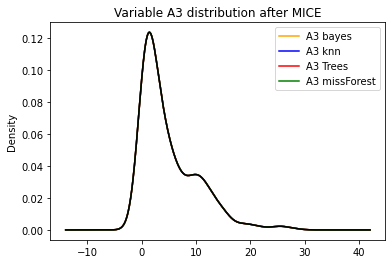

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['A3'].plot(kind='kde', ax=ax, color='orange')

X_train_bayes['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['A3'].plot(kind='kde', ax=ax, color='green')
X_train_miss_forest['A3'].plot(kind='kde', ax=ax, color='black')
#X_train_bayes['A3'].plot(kind='kde', ax=ax, color='blue')
lines, labels = ax.get_legend_handles_labels()
labels = [ 'A3 bayes', 'A3 knn', 'A3 Trees', 'A3 missForest']
ax.legend(lines, labels, loc='best')
plt.title('Variable A3 distribution after MICE')
plt.show()
